# TELECOM CHURN CASE STUDY

### 1. Importing and Understanding Data

In [122]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [123]:
#Code to show all columns of dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [124]:
tcdf = pd.read_csv("telecom_churn_data.csv")
tcdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [125]:
tcdf.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [126]:
tcdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### 2. Handling missing data

In [127]:
round(tcdf.isnull().sum()/len(tcdf.index)*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [128]:
#Imputing missing values for total and average rech_amt
rech_cols_list=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in rech_cols_list:
    tcdf[col].fillna(0,inplace=True)
tcdf[rech_cols_list].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

In [129]:
#Columns with > 70% of null values
tc70null=pd.DataFrame(tcdf.isnull().sum()).reset_index()
tc70null.columns=['Col','nullval']
col_list=list(tc70null[round(tc70null['nullval']/len(tcdf.index)*100,2)>70]['Col'])
round(tcdf[col_list].isnull().sum()/len(tcdf.index)*100,2)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7     

In [130]:
print(col_list)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [131]:
#impute with 0s for below columns
impute_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
tcdf[impute_cols] = tcdf[impute_cols].apply(lambda x: x.fillna(0))


In [132]:
#category columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
modes=tcdf[cat_cols].agg('mode')

for col in cat_cols:
    tcdf[col]=tcdf[col].fillna(modes[col])

In [133]:
tcdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [134]:
#Columns with > 70% of null values
tc70null=pd.DataFrame(tcdf.isnull().sum()).reset_index()
tc70null.columns=['Col','nullval']
col_list=list(tc70null[round(tc70null['nullval']/len(tcdf.index)*100,2)>70]['Col'])
print("before: \n",round(tcdf[col_list].isnull().sum()/len(tcdf.index)*100,2))
tcdf.drop(col_list, axis=1, inplace=True)

before: 
 date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7                   74.43
fb_user_8                   73.66
fb_user_9                   74.08
dtype: float64


In [135]:
# minutes of usage 'mou' columns
mou_cols = tcdf.columns[tcdf.columns.str.contains('mou')]

# replacing missing values in mou columns with 0
tcdf.loc[:,mou_cols] = tcdf.loc[:,mou_cols].replace(np.NaN,0)

### 3. Filter high value customers

In [136]:
# calculate total recharge amount for june and july = number of recharges * average recharge amount
tcdf['total_data_rech_6'] = tcdf.total_rech_data_6 * tcdf.av_rech_amt_data_6
tcdf['total_data_rech_7'] = tcdf.total_rech_data_7 * tcdf.av_rech_amt_data_7

In [137]:
# calculate total recharge amount for June and July = recharge amount + data recharge amount
tcdf['amt_data_6'] = tcdf.total_rech_amt_6 + tcdf.total_data_rech_6
tcdf['amt_data_7'] = tcdf.total_rech_amt_7 + tcdf.total_data_rech_7

In [138]:
#calculate average
tcdf['av_amt_data_6_7'] = (tcdf.amt_data_6 + tcdf.amt_data_7)/2

In [139]:
# Get 70th percentile recharge amount
avg_6_7_70percent = tcdf.av_amt_data_6_7.quantile(0.7)
print("Recharge amount at 70th percentile: {0}".format(avg_6_7_70percent))

Recharge amount at 70th percentile: 478.0


In [140]:
# Keep only customers with more than 70th percentile amount
tcdf_hv = tcdf.loc[tcdf.av_amt_data_6_7 > tcdf.av_amt_data_6_7.quantile(0.7), :]
tcdf_hv = tcdf_hv.reset_index(drop=True)
tcdf_hv.shape

(29953, 203)

In [141]:
#delete temporary columns
tcdf_hv = tcdf_hv.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
tcdf_hv.shape

(29953, 198)

### 4. Derive Churn

In [142]:
# total_icog_calls_9 = total incoming and outgoing minutes of usage
tcdf_hv['total_icog_calls_9'] = tcdf_hv.total_ic_mou_9 + tcdf_hv.total_og_mou_9

In [143]:
# calculate 2g and 3g data consumption
tcdf_hv['total_internet_9'] =  tcdf_hv.vol_2g_mb_9 + tcdf_hv.vol_3g_mb_9

In [144]:
#create churn variable - those who have not used either calls or internet in the month of September are customers who have churned
tcdf_hv['churn'] = tcdf_hv.apply(lambda row: 1 if (row.total_icog_calls_9 == 0 and row.total_internet_9 == 0) else 0, axis=1)

In [145]:
# delete temporary columns
tcdf_hv = tcdf_hv.drop(['total_icog_calls_9', 'total_internet_9'], axis=1)

In [146]:
#churn percentage
print("Churn Percentage:")
print(tcdf_hv.churn.value_counts()*100/tcdf_hv.shape[0])

Churn Percentage:
0    91.877274
1     8.122726
Name: churn, dtype: float64


In [147]:
#delete columns that belong to 9th month


In [148]:
col_9 = [x for x in tcdf_hv.columns if x.split("_")[-1]=="9" ]
#col_9.append('fb_9_1.0')
#col_9.append('night_9_1.0')
col_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [149]:
tcdf_hv.drop(col_9, axis=1, inplace=True)
tcdf_hv.shape

(29953, 152)

### 5.EDA

In [150]:
#Check uniques
tcdf_hv.nunique()

mobile_number           29953
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
arpu_6                  29029
arpu_7                  29040
arpu_8                  28035
onnet_mou_6             16872
onnet_mou_7             16973
onnet_mou_8             15854
offnet_mou_6            21198
offnet_mou_7            21233
offnet_mou_8            20140
roam_ic_mou_6            4045
roam_ic_mou_7            3381
roam_ic_mou_8            3431
roam_og_mou_6            4742
roam_og_mou_7            3988
roam_og_mou_8            3996
loc_og_t2t_mou_6        10416
loc_og_t2t_mou_7        10388
loc_og_t2t_mou_8        10056
loc_og_t2m_mou_6        15607
loc_og_t2m_mou_7        15659
loc_og_t2m_mou_8        15118
loc_og_t2f_mou_6         3089
loc_og_t2f_mou_7         3097
loc_og_t2f_mou_8         2988
loc_og_t2c_mou_6         1682
loc_og_t2c

In [151]:
# Remove columns with single values as they dont have any variance
single_val_cols=['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
tcdf_hv.drop(single_val_cols, axis=1, inplace=True)
tcdf_hv.shape

(29953, 139)

In [152]:
# Box plots for  6th, 7th and 8th month
def plot_box_chart(attri):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=tcdf_hv,y=attri+"_6",x="churn",hue="churn")
    plt.subplot(2,3,2)
    sns.boxplot(data=tcdf_hv, y=attri+"_7",x="churn",hue="churn")
    plt.subplot(2,3,3)
    sns.boxplot(data=tcdf_hv, y=attri+"_8",x="churn",hue="churn")
    plt.show()

In [153]:
# recharge amount columns
rech_amt_cols =  tcdf_hv.columns[tcdf_hv.columns.str.contains('rech_amt|rech_num|max_rech_data')]
rech_amt_cols.tolist()

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

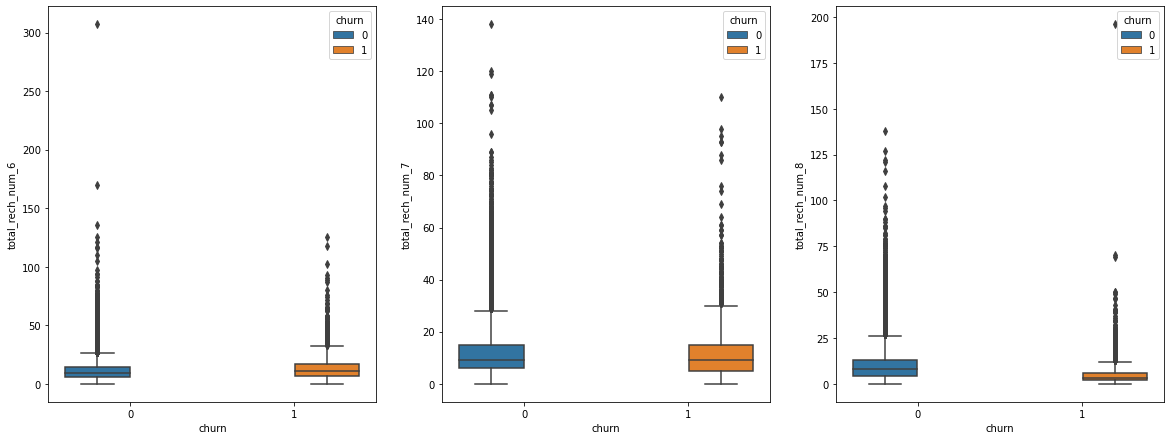

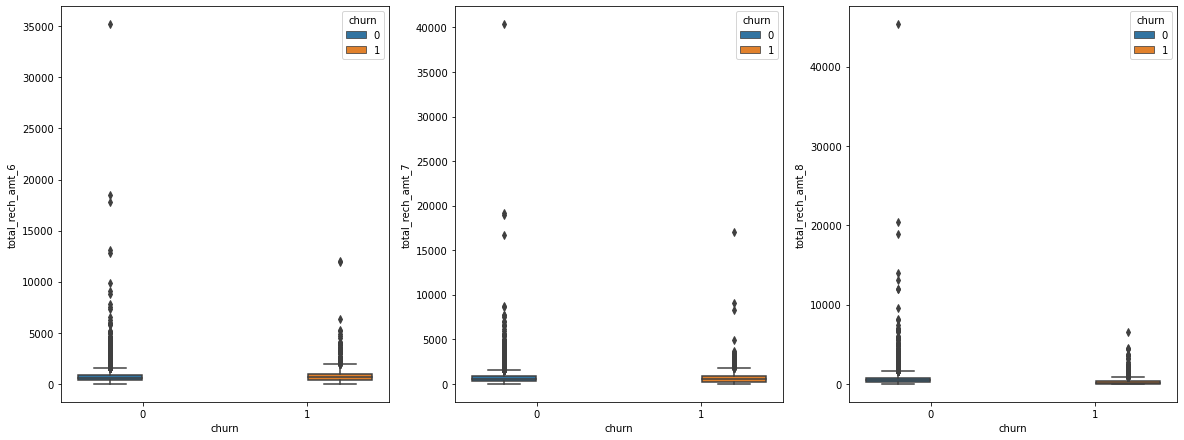

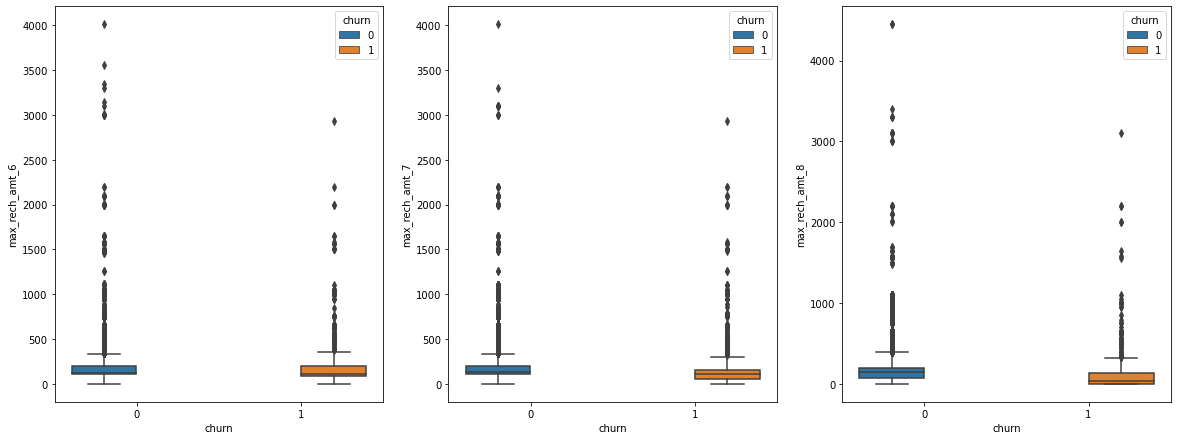

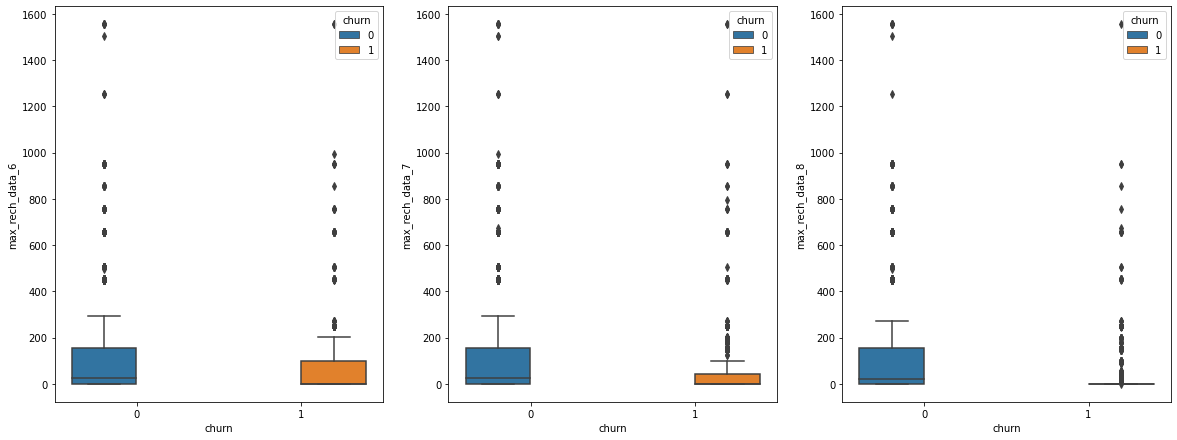

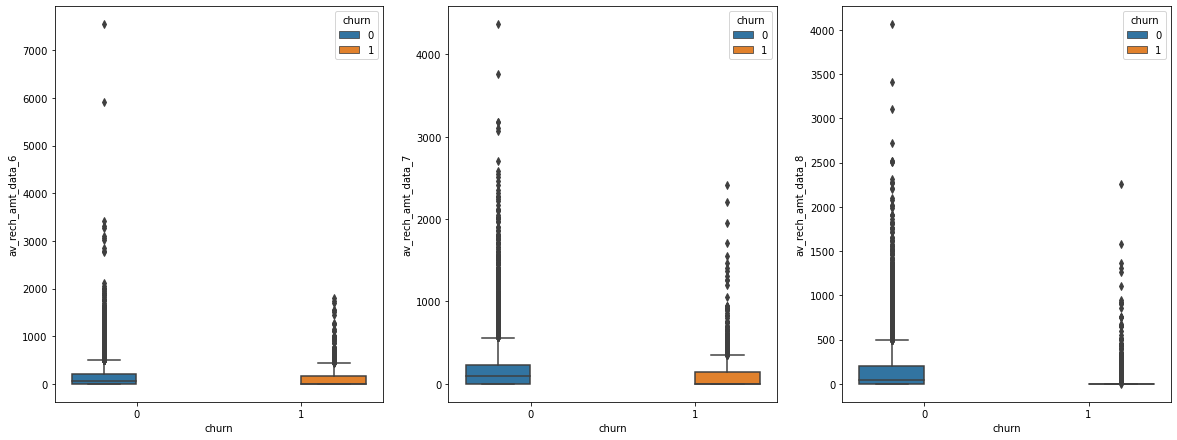

In [154]:
l=['total_rech_num','total_rech_amt','max_rech_amt','max_rech_data','av_rech_amt_data']
for i in l:
    plot_box_chart(i)

The above boxplots show that recharge done by churned customers in 8th month is comparitively low

In [155]:
# 2g, 3g usage columns
use_2g_3g = tcdf_hv.columns[tcdf_hv.columns.str.contains('2g|3g',regex=True)]
use_2g_3g.tolist()

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [156]:
# Renaming columns
tcdf_hv.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column
tcdf_hv.drop('vbc_3g_9',axis=1,inplace=True)

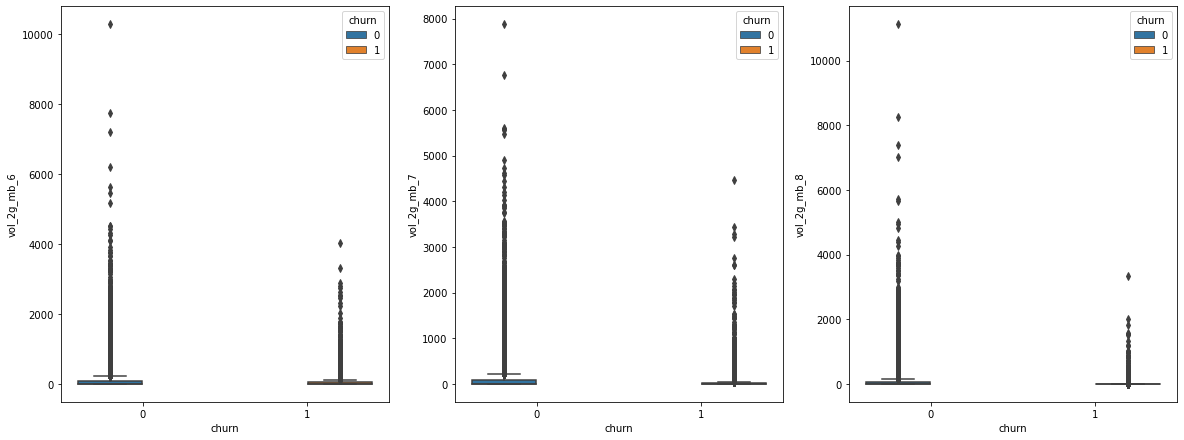

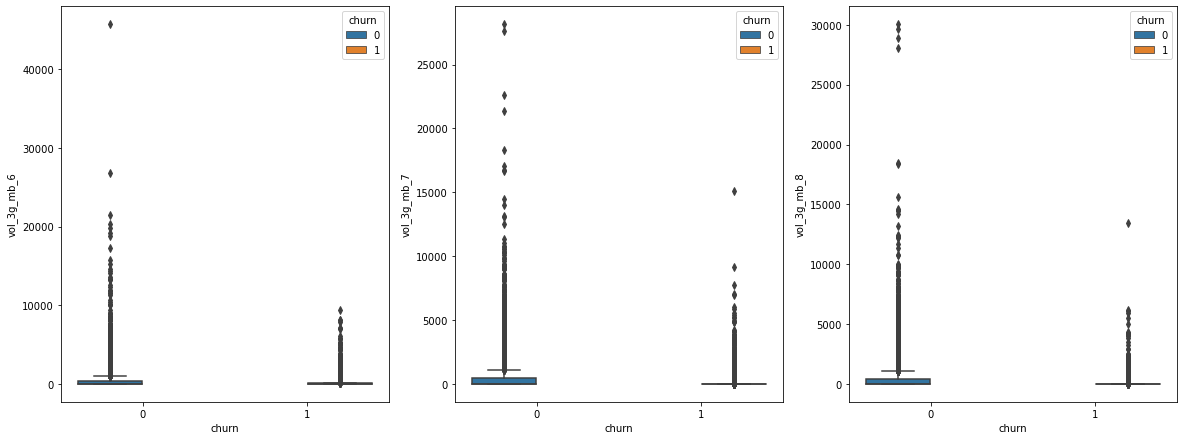

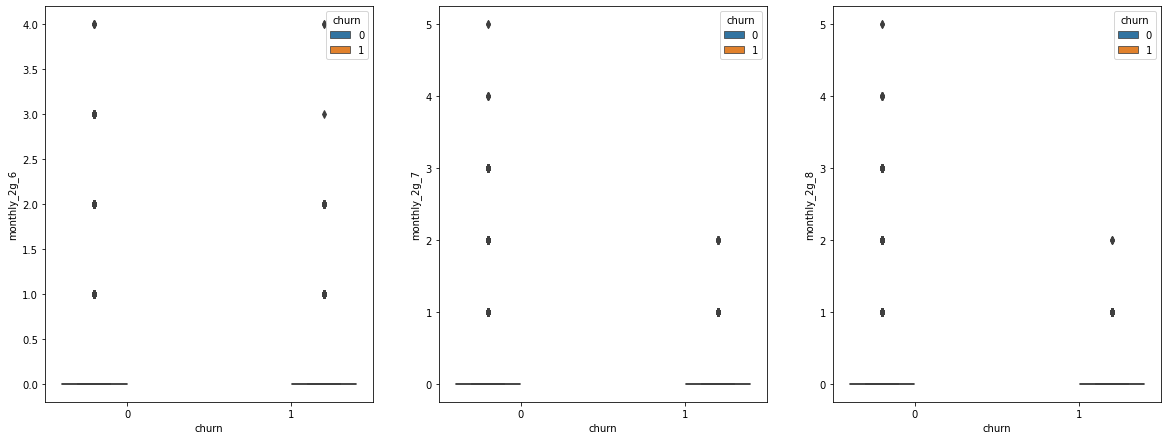

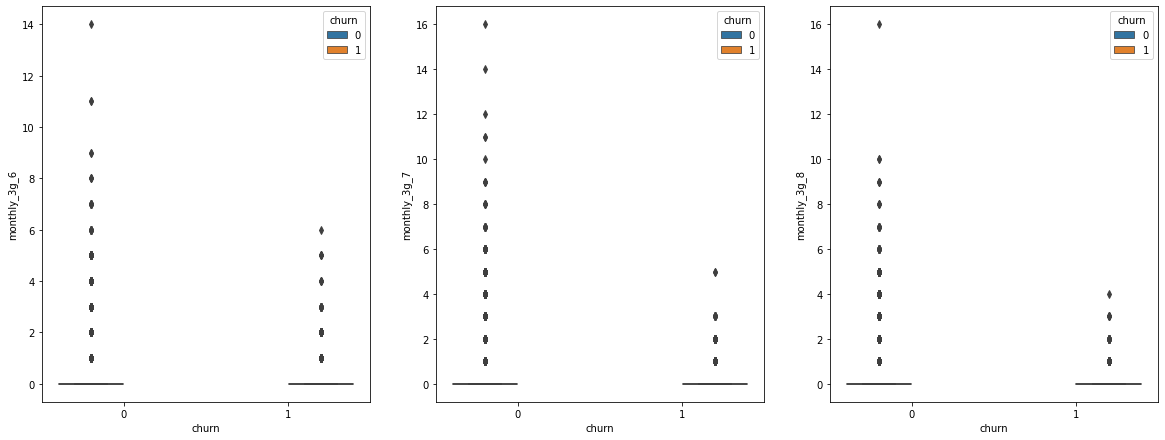

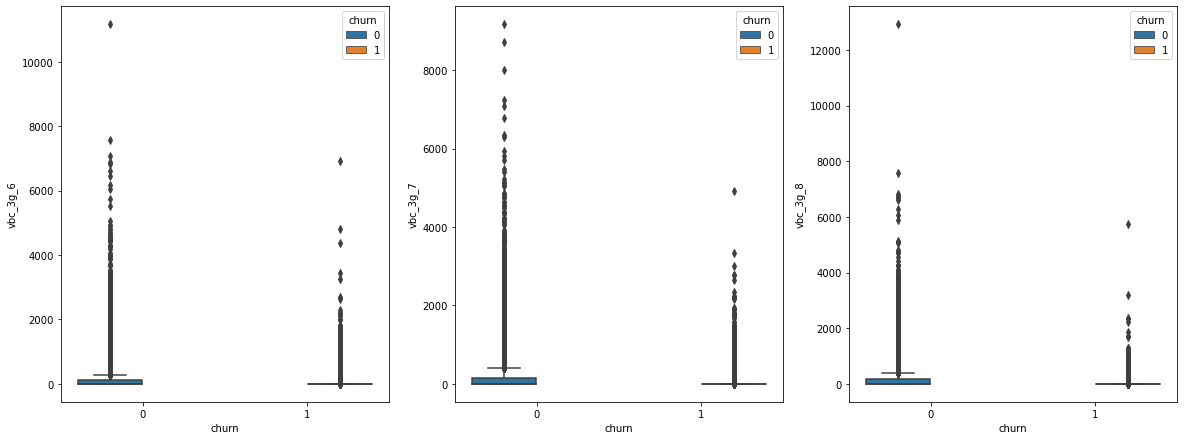

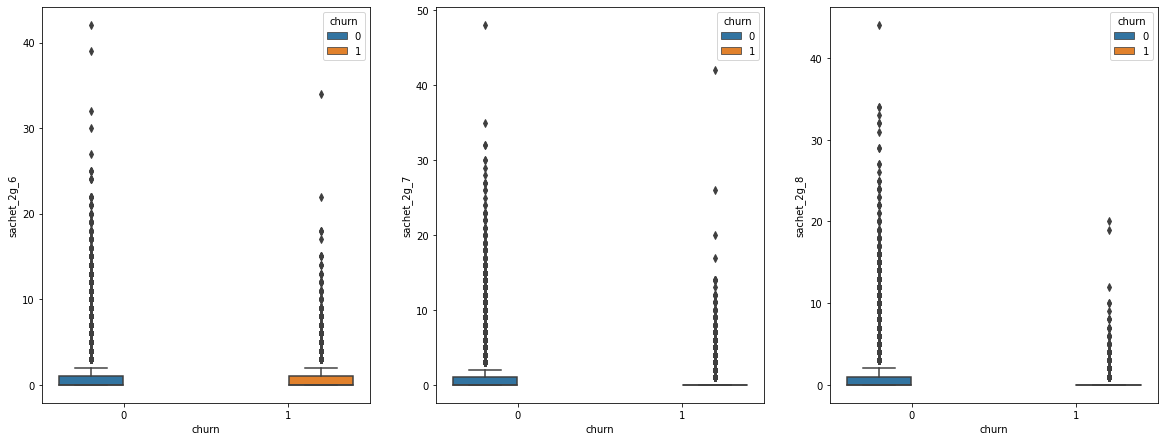

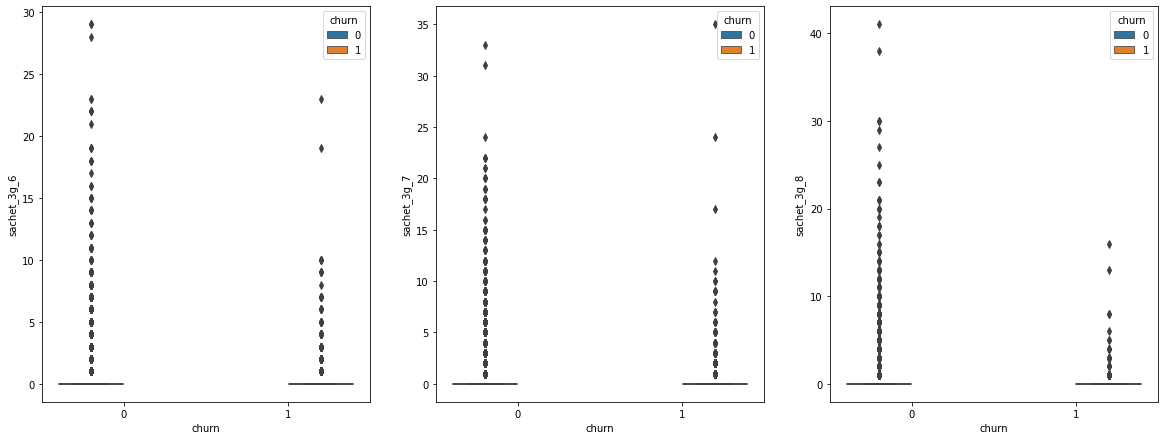

In [157]:
l=['vol_2g_mb','vol_3g_mb','monthly_2g','monthly_3g','vbc_3g','sachet_2g','sachet_3g']
for i in l:
    plot_box_chart(i)

Some of the above boxplots are not very clear so we shall go ahead and analyse using bar graphs

In [158]:
def plot_bar_chart(attri):
    
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.barplot(data=tcdf_hv,y=attri+"_6",x="churn",hue="churn",estimator=np.mean)
    plt.subplot(2,3,2)
    sns.barplot(data=tcdf_hv, y=attri+"_7",x="churn",hue="churn",estimator=np.mean)
    plt.subplot(2,3,3)
    sns.barplot(data=tcdf_hv, y=attri+"_8",x="churn",hue="churn",estimator=np.mean)
    plt.show()

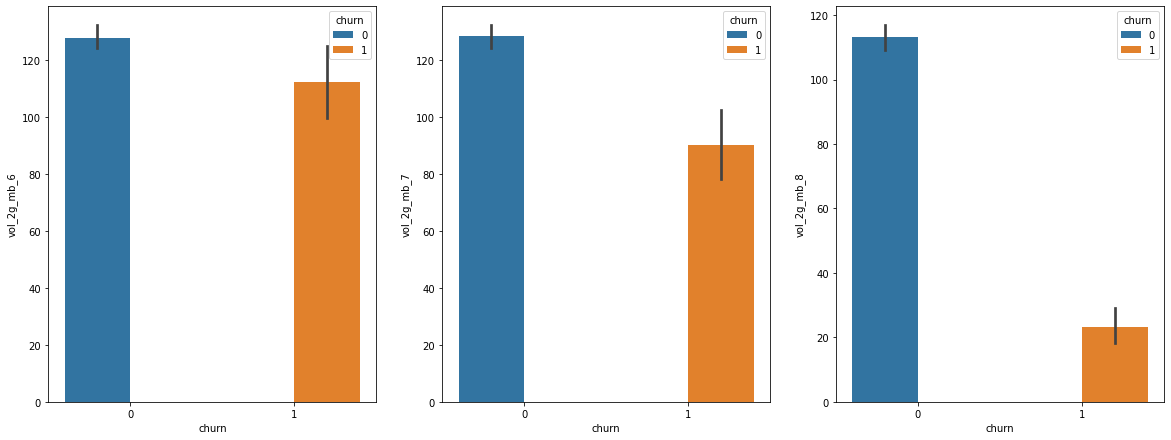

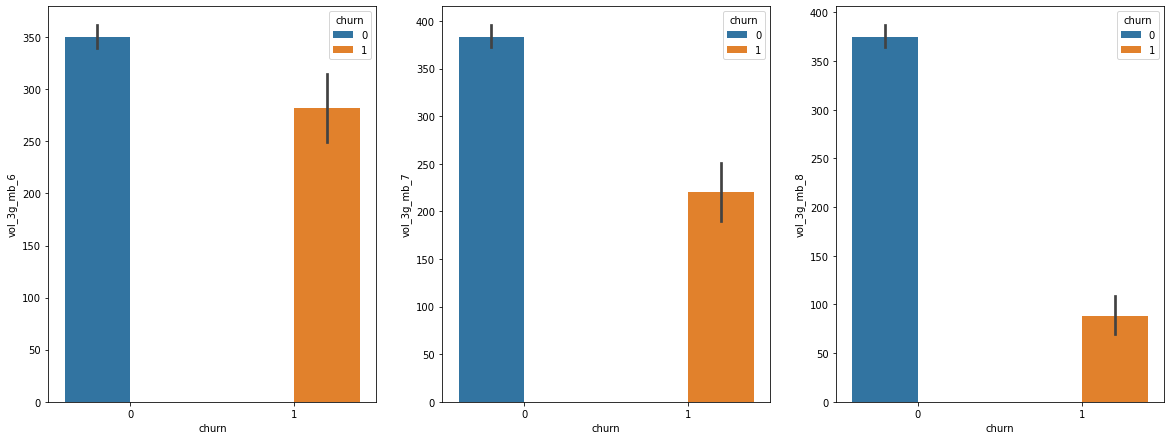

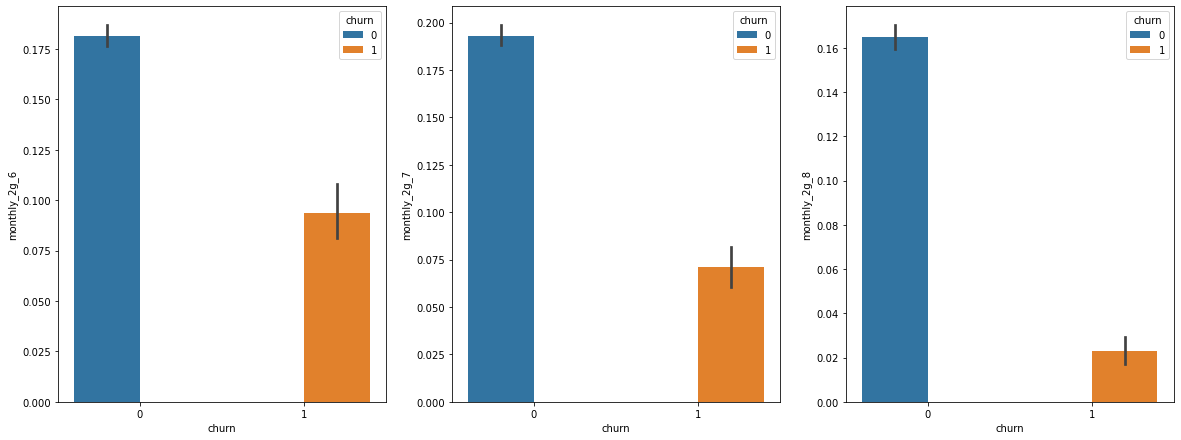

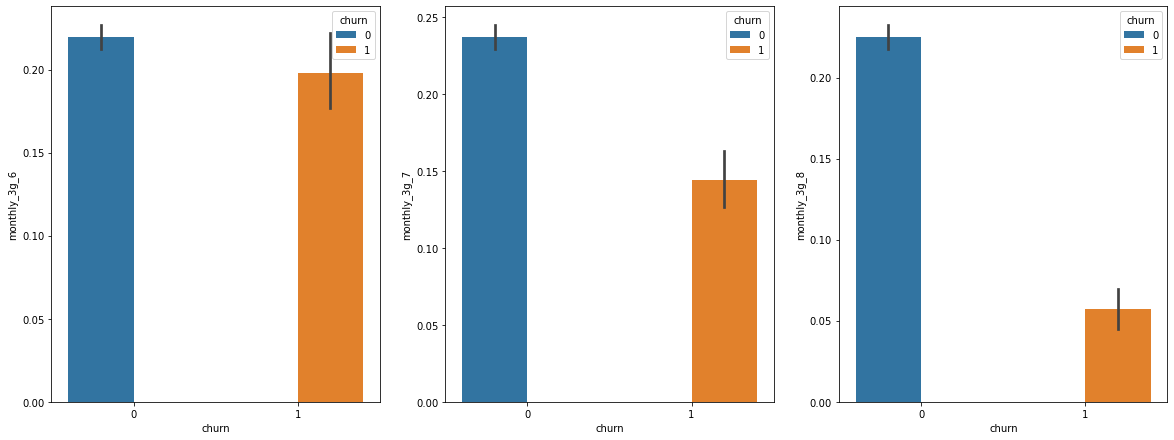

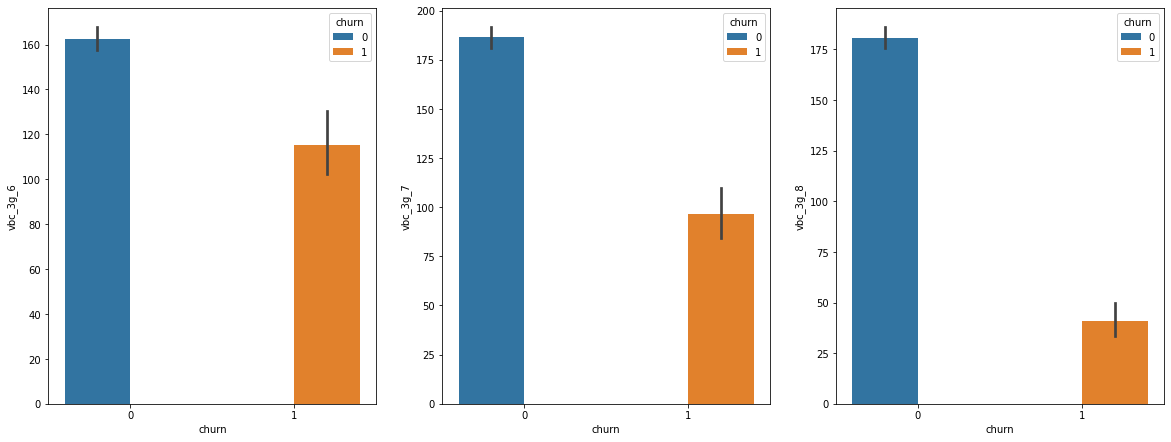

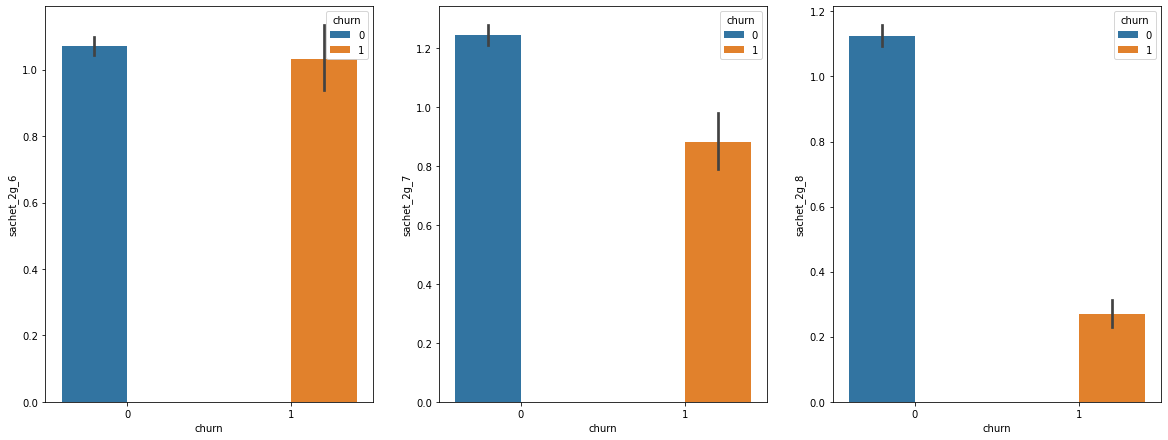

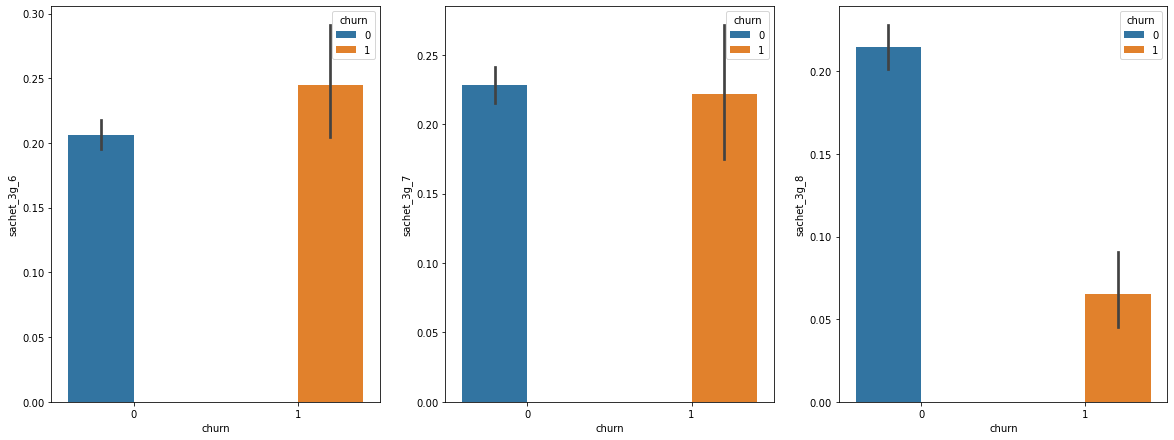

In [159]:
l=['vol_2g_mb','vol_3g_mb','monthly_2g','monthly_3g','vbc_3g','sachet_2g','sachet_3g']
for i in l:
    plot_bar_chart(i)

The above bar graphs show that 2g and 3g usage by churned customers in 8th month is comparitively low

In [160]:
# average revenue per user
arpu = tcdf_hv.columns[tcdf_hv.columns.str.contains('arpu',regex=True)]
arpu.tolist()

['arpu_6', 'arpu_7', 'arpu_8']

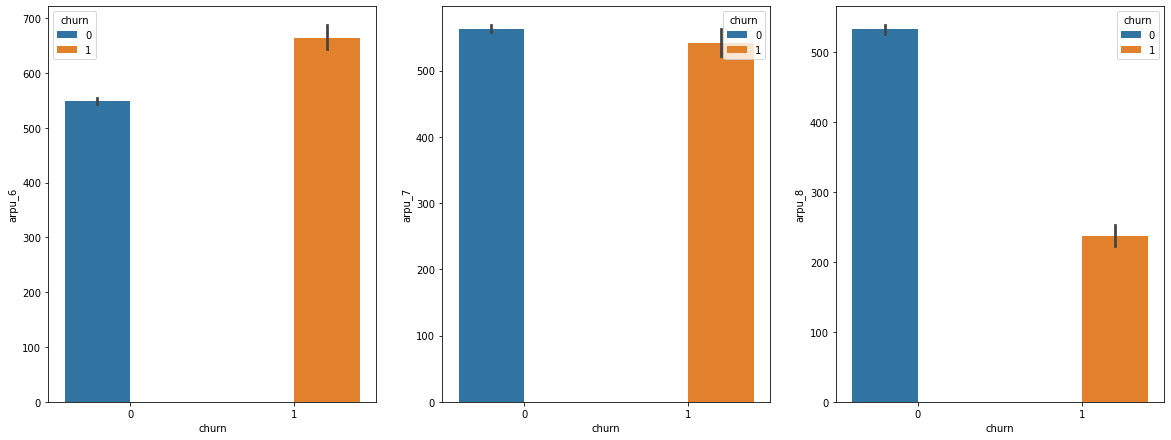

In [161]:
plot_bar_chart('arpu')

The above bar graphs show that average revenue of churned customers in 8th month is comparitively low

In [162]:
# Age of network
tcdf_hv['aon'].describe()

count    29953.000000
mean      1209.280573
std        957.449442
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

In [163]:
# Converting days to years
tcdf_hv['aon_year']=tcdf_hv['aon']/365
tcdf_hv['aon_year'].describe()

count    29953.000000
mean         3.313097
std          2.623149
min          0.493151
25%          1.260274
50%          2.317808
75%          4.810959
max         11.838356
Name: aon_year, dtype: float64

In [164]:
# binning 'aon' column 
aon_year_range = [0, 1, 2, 5, 12]
aon_year_label = [ '<1 year', '1-2 years', '2-5 years', '>5 years']
tcdf_hv['aon_year_range'] = pd.cut(tcdf_hv['aon_year'], aon_year_range, labels=aon_year_label)
tcdf_hv['aon_year_range'].head()

0    2-5 years
1    2-5 years
2      <1 year
3    1-2 years
4    1-2 years
Name: aon_year_range, dtype: category
Categories (4, object): [<1 year < 1-2 years < 2-5 years < >5 years]

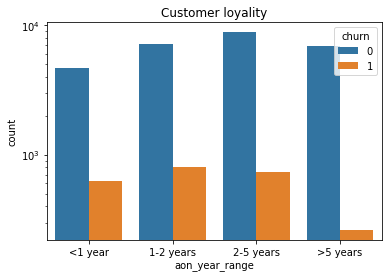

In [165]:
# Customer loyality graph
sns.countplot(tcdf_hv['aon_year_range'],hue=tcdf_hv["churn"])
plt.yscale("log")
plt.title("Customer loyality")
plt.show()

The above graph implies that lot of customers churn after using the service for 1-2 years 

In [166]:
# Columns with null value
tcdf_hv[tcdf_hv.columns[tcdf_hv.isnull().any()]].isnull().sum() * 100 / tcdf_hv.shape[0]

og_others_6            1.809502
og_others_7            1.789470
og_others_8            3.912797
ic_others_6            1.809502
ic_others_7            1.789470
ic_others_8            3.912797
date_of_last_rech_6    0.243715
date_of_last_rech_7    0.327179
date_of_last_rech_8    1.943044
dtype: float64

In [167]:
# Replacing with NaN
col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']
tcdf_hv.loc[:,col] = tcdf_hv.loc[:,col].replace(np.NaN,0)

In [168]:
tcdf_hv[tcdf_hv.columns[tcdf_hv.isnull().any()]].isnull().sum() * 100 / tcdf_hv.shape[0]

date_of_last_rech_6    0.243715
date_of_last_rech_7    0.327179
date_of_last_rech_8    1.943044
dtype: float64

### 6.Outlier Treatment

In [169]:
# checking for outliers
tcdf_hv.describe(percentiles=[0.25,0.5,0.75,0.9,.95,0.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,aon_year
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,84.574122,85.762835,78.153334,163.309546,163.087606,151.810056,6.348347,6.426493,5.891

In [170]:
# Columns that require capping
cols = list(tcdf_hv.select_dtypes([np.number]).columns)
cols_remove=['aon','aon_year','monthly_2g_8','monthly_2g_7','monthly_2g_6','mobile_number']
cols=[element for element in cols if element not in cols_remove]

In [171]:
# Capping the outliers
for i in cols:
    q1 = tcdf_hv[i].quantile(0.99)
    tcdf_hv[i][tcdf_hv[i]>= q1] = q1
tcdf_hv.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,aon_year
count,2.995300e+04,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.0,29953.0,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,7.001206e+09,548.886461,551.105294,498.447779,252.279873,258.850360,225.119187,366.027066,369.635673,325.095745,13.593757,9.642486,9.776261,22.757224,16.679798,16.003068,76.356608,76.763426,69.799448,157.723283,158.273725,147.355205,5.646319,5.733811,5.290379,1.364487

In [172]:
# Removing date columns
tcdf_hv.drop(tcdf_hv.filter(regex='date_').columns,axis=1,inplace=True)
tcdf_hv.drop(['mobile_number','aon_year','aon_year_range'],axis=1,inplace=True)
tcdf_hv.shape

(29953, 134)

In [173]:
### Derive new columns

In [174]:
# Finding average of 6th and 7th month columns 
col_list = list(tcdf_hv.filter(regex='_6|_7').columns.str[:-2])
for col in col_list:
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    tcdf_hv[avg_col_name] = (tcdf_hv[col_6]  + tcdf_hv[col_7])/ 2

In [175]:
# Removing 6th and 7th month columns
tcdf_hv.drop(tcdf_hv.filter(regex='_6|_7').columns,axis=1,inplace=True)
tcdf_hv.shape

(29953, 90)

In [176]:
### Data imbalance

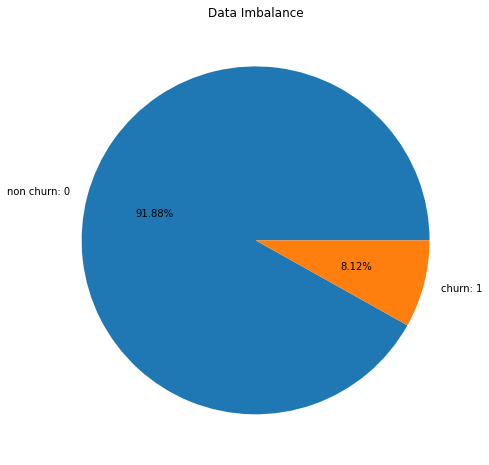

In [177]:
plt.figure(figsize=(8,8))
plt.pie(tcdf_hv['churn'].value_counts(),labels=['non churn: 0','churn: 1'],autopct='%1.2f%%')
plt.title('Data Imbalance')
plt.show()

### 7.Model building 1

In [178]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [179]:
X = tcdf_hv.drop("churn", axis = 1)
y = tcdf_hv.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [180]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (20967, 89)
y_train:  (20967,)
X_test:  (8986, 89)
y_test:  (8986,)


In [181]:
pca = PCA(svd_solver='randomized', random_state=42)

In [182]:
#PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [183]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 1.75811159e-01  1.92882774e-01  2.17465984e-01 ... -7.90854083e-05
  -6.94392623e-05 -6.45467359e-02]
 [ 1.68065974e-01  4.19664005e-03  8.20903693e-02 ...  1.65869719e-04
   1.41005018e-05  1.23645849e-01]
 [ 1.15533062e-01  2.41568339e-02  2.66475551e-02 ...  2.60514202e-04
   1.09148563e-04  1.93687674e-01]
 ...
 [-6.29704588e-06  1.42281176e-05  1.68663116e-05 ... -2.00419318e-02
  -1.14075921e-02  5.23356833e-06]
 [-1.19498371e-05 -6.86835196e-06  1.79813040e-05 ... -9.52679267e-03
  -2.20692441e-03  1.35204199e-06]
 [ 0.00000000e+00  1.20108978e-16 -3.04964524e-17 ...  9.68463591e-17
  -4.09232110e-16 -8.32667268e-17]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.175811,0.168066,0.115533,0.089718,-0.036481,-0.220396,-0.240490,-0.242813,0.087677,-0.046286,arpu_8
1,0.192883,0.004197,0.024157,-0.147087,-0.378502,-0.103282,0.005242,0.123026,-0.009665,0.023286,onnet_mou_8
2,0.217466,0.082090,0.026648,0.168345,0.296194,-0.204435,0.019633,0.135919,-0.015181,-0.003590,offnet_mou_8
3,0.001505,0.001571,0.000181,0.000831,0.002082,0.004981,-0.015812,-0.019269,0.011412,-0.002474,roam_ic_mou_8
4,0.004872,0.001280,0.000866,-0.000238,0.003728,0.006124,-0.034336,-0.030324,0.019174,-0.007734,roam_og_mou_8
5,0.026976,0.042381,-0.009264,0.062307,-0.080549,0.004123,-0.041352,0.131037,-0.051534,0.042311,loc_og_t2t_mou_8
6,0.043914,0.093094,-0.021496,0.163006,-0.029698,-0.024356,-0.064673,0.117190,-0.033840,-0.013263,loc_og_t2m_mou_8
7,0.000545,0.004024,-0.001272,0.003585,-0.000871,-0.000778,-0.002063,-0.001186,0.001694,-0.001245,loc_og_t2f_mou_8
8,0.000313,0.000038,0.000167,0.000027,-0.000204,-0.000482,0.000131,-0.000020,-0.000466,0.000522,loc_og_t2c_mou_8
9,0.077378,0.145592,-0.031729,0.242618,-0.127745,-0.019290,-0.126891,0.289795,-0.099581,0.042462,loc_og_mou_8


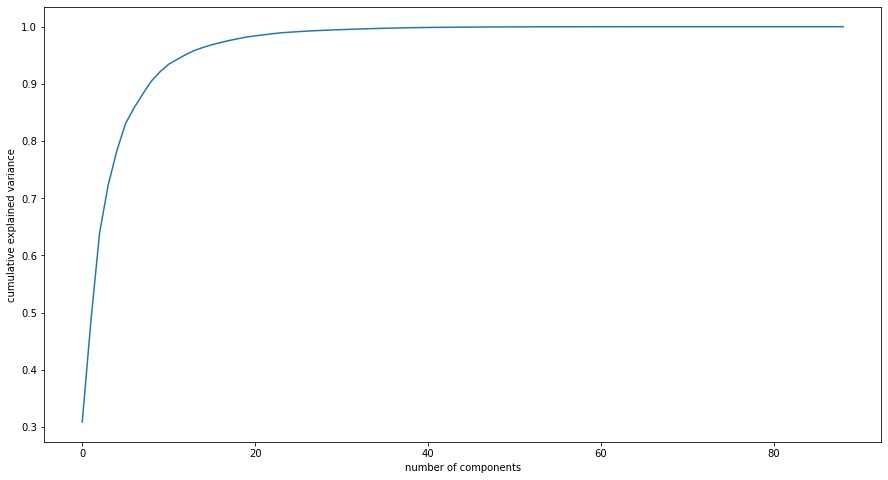

In [184]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- 15 components explain 90% of variance

In [185]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 15)

In [186]:
# Correlation matrix

In [187]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

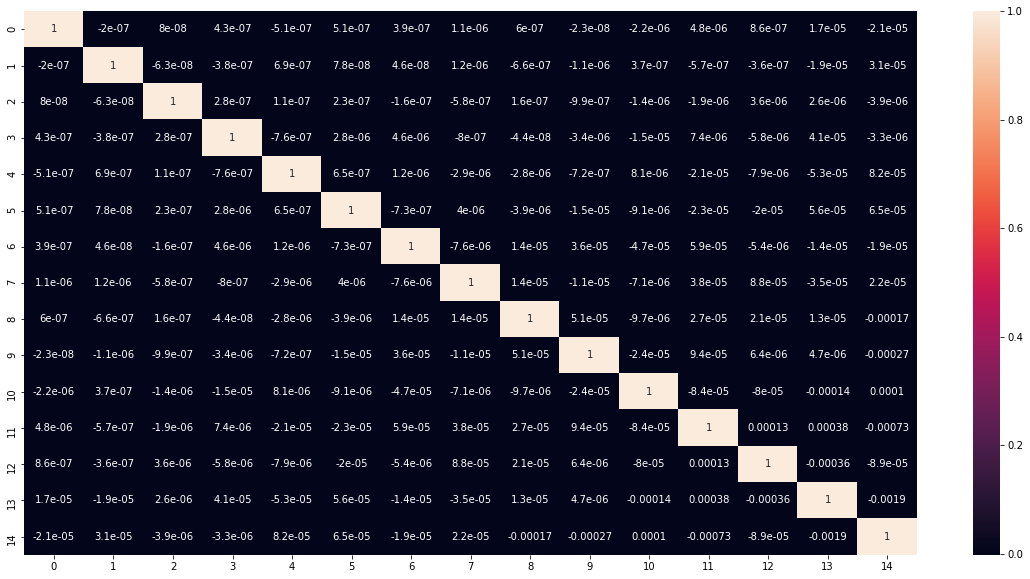

In [188]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [189]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0003777658398385933 , min corr:  -0.0018694348464905392


In [190]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 15)

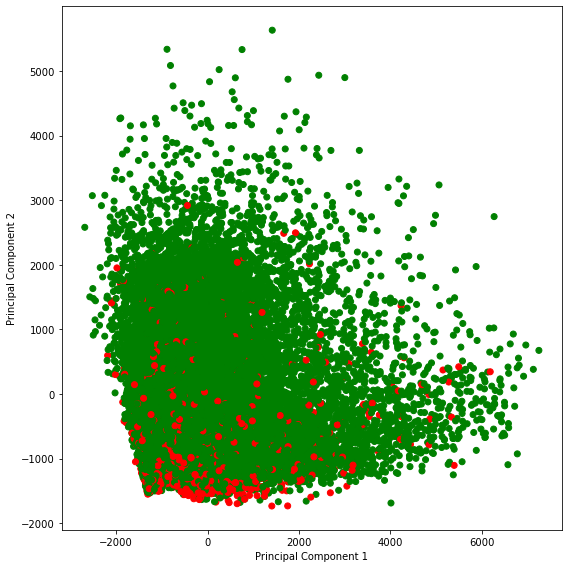

In [191]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#### LogisticRegression model with PCA

In [192]:
learner_pca = LogisticRegression(class_weight='balanced',random_state=100)
model_pca = learner_pca.fit(df_train_pca,y_train)

In [193]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [194]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [195]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6488 1817]
 [ 104  577]]
0.7862230135766748


In [196]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [197]:
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8803689372058833


In [198]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

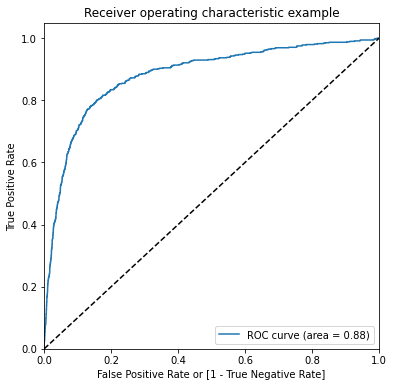

(array([0.        , 0.        , 0.        , ..., 0.99975918, 0.99987959,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99811670e+00, 9.98116700e-01, 9.94926493e-01, ...,
        2.27443839e-06, 2.07918211e-06, 1.99184163e-06]))

In [199]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [200]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.321801,1,1,1,1,0,0,0,0,0,0
1,0,0.008411,1,0,0,0,0,0,0,0,0,0
2,0,0.091381,1,0,0,0,0,0,0,0,0,0
3,0,0.174522,1,1,0,0,0,0,0,0,0,0
4,0,0.617675,1,1,1,1,1,1,1,0,0,0


In [201]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.075785     0.000000     1.000000
0.1   0.1  0.342867     0.291511     0.969163
0.2   0.2  0.472735     0.434196     0.942731
0.3   0.3  0.596595     0.570018     0.920705
0.4   0.4  0.694414     0.677784     0.897210
0.5   0.5  0.786223     0.781216     0.847283
0.6   0.6  0.859671     0.866827     0.772394
0.7   0.7  0.903405     0.924503     0.646109
0.8   0.8  0.922657     0.959783     0.469897
0.9   0.9  0.929668     0.989163     0.204112


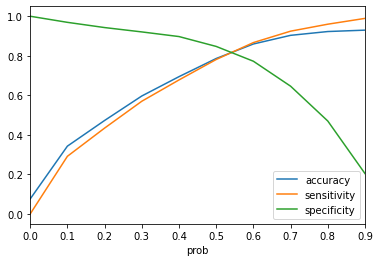

In [202]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [203]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_pred_final.churn.value_counts()

0    8305
1     681
Name: churn, dtype: int64

In [204]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6854, 1451],
       [ 127,  554]], dtype=int64)

In [205]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7862230135766748
Sensitivity:  0.8135095447870778
Specificity:  0.8252859723058399
false postive rate:  0.17471402769416014
positive predictive value:  0.27630922693266835
Negative predictive value:  0.9818077639306689
Misclassification Rate:  0.17560649899844202


#### Decision tree

In [206]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [207]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      8305
           1       0.21      0.78      0.33       681

    accuracy                           0.76      8986
   macro avg       0.60      0.77      0.60      8986
weighted avg       0.92      0.76      0.82      8986

[[6331 1974]
 [ 147  534]]
Acuracy Score 0.7639661695971511


In [208]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7639661695971511
Sensitivity:  0.7841409691629956
Specificity:  0.7623118603251053
false postive rate:  0.23768813967489463
positive predictive value:  0.21291866028708134
Negative predictive value:  0.9773078110527941
Misclassification Rate:  0.23603383040284887


In [209]:
#hyperparameter tuning

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [211]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045688,0.001923,0.000987,0.000025,1,{'max_depth': 1},0.782546,0.784931,0.795612,0.780348,0.793227,0.787332,0.006012,36
1,0.101714,0.018720,0.001797,0.000745,2,{'max_depth': 2},0.724368,0.759657,0.744336,0.753160,0.744574,0.745219,0.011896,39
2,0.154994,0.011900,0.001587,0.000482,3,{'max_depth': 3},0.757272,0.759418,0.746005,0.758168,0.745051,0.753184,0.006294,38
3,0.192837,0.008591,0.001397,0.000489,4,{'max_depth': 4},0.798522,0.771578,0.778440,0.788695,0.774147,0.782277,0.010004,37
4,0.210231,0.018607,0.001198,0.000399,5,{'max_depth': 5},0.790176,0.813782,0.802528,0.793704,0.754829,0.791005,0.019840,35


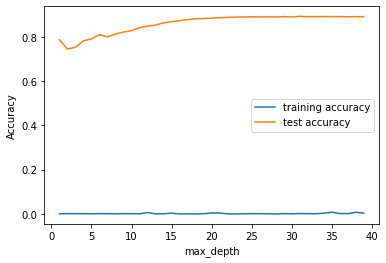

In [212]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_score_time"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [213]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [214]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.463203,0.105687,0.001995,0.000629,5,{'min_samples_leaf': 5},0.845017,0.848355,0.856189,0.846172,0.849988,0.849144,0.003920,1
1,0.592963,0.138134,0.002993,0.002092,25,{'min_samples_leaf': 25},0.795899,0.790415,0.802290,0.790365,0.792988,0.794391,0.004442,2
2,0.312419,0.021419,0.001796,0.000399,45,{'min_samples_leaf': 45},0.773963,0.771340,0.774863,0.784164,0.789411,0.778748,0.006869,5
3,0.275102,0.008616,0.000200,0.000399,65,{'min_samples_leaf': 65},0.777778,0.783262,0.771762,0.770093,0.769616,0.774503,0.005259,7
4,0.286473,0.030627,0.001182,0.000408,85,{'min_samples_leaf': 85},0.784454,0.788507,0.788218,0.759838,0.774624,0.779129,0.010875,4


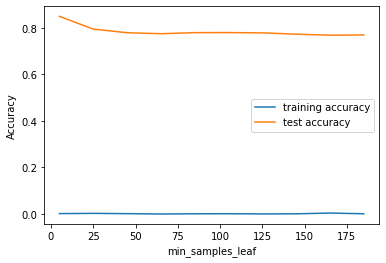

In [215]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_score_time"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [216]:
# Create the parameter grid 
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [4,5,6],
    'criterion': ["entropy","gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   49.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6], 'min_samples_leaf': [4, 5

In [217]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.429055,0.059833,0.004442,0.007909,entropy,4,4,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.768002,0.763233,0.79752,0.77057,0.762938,0.772452,0.012862,46
1,0.573061,0.034196,0.006082,0.005958,entropy,4,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.768002,0.763233,0.79752,0.77057,0.762938,0.772452,0.012862,46
2,0.669495,0.072771,0.002791,0.001160,entropy,4,4,6,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.768002,0.763233,0.79752,0.77057,0.762938,0.772452,0.012862,46
3,0.607538,0.034398,0.003001,0.003691,entropy,4,5,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.768002,0.763233,0.79752,0.77057,0.762938,0.772452,0.012862,46
4,0.808512,0.108186,0.003590,0.002645,entropy,4,5,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.768002,0.763233,0.79752,0.77057,0.762938,0.772452,0.012862,46


In [218]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8094624886726761
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')


In [219]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [220]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6808, 1497],
       [ 164,  517]], dtype=int64)

In [221]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.7591776798825257
Specificity:  0.8197471402769416
false postive rate:  0.1802528597230584
positive predictive value:  0.2567030784508441
Negative predictive value:  0.9764773379231211
Misclassification Rate:  0.18484308924994436


#### Random forest

In [222]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced',random_state=100)

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [223]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8209,   96],
       [ 564,  117]], dtype=int64)

In [224]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.17180616740088106
Specificity:  0.9884406983744732
false postive rate:  0.011559301625526791
positive predictive value:  0.5492957746478874
Negative predictive value:  0.9357118431551351
Misclassification Rate:  0.07344758513242822


In [225]:
#hyperparameter tuning
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced',random_state=100)


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [226]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.270158,0.026358,0.016357,0.006927,2,{'max_depth': 2},0.763948,0.756795,0.789649,0.774386,0.811352,0.779224,0.019497,4
1,0.770336,0.030724,0.012169,0.001596,7,{'max_depth': 7},0.849785,0.864092,0.870975,0.853804,0.855473,0.858826,0.007662,3
2,1.050787,0.072658,0.014362,0.001850,12,{'max_depth': 12},0.899380,0.909871,0.899833,0.892917,0.895063,0.899413,0.005843,2
3,1.266940,0.117833,0.018953,0.003440,17,{'max_depth': 17},0.916071,0.920601,0.918912,0.915097,0.912473,0.916631,0.002861,1


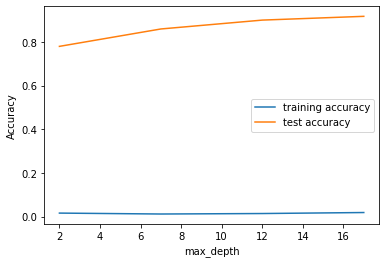

In [227]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_score_time"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [228]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [229]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.814453,0.183218,0.129853,0.012886,100,{'n_estimators': 100},0.891750,0.898903,0.901503,0.889578,0.893394,0.895026,0.004473,4
1,45.549785,0.667570,0.646537,0.034692,500,{'n_estimators': 500},0.895088,0.903195,0.902695,0.889816,0.895063,0.897172,0.005093,1
2,78.993216,1.774560,1.038543,0.056437,900,{'n_estimators': 900},0.893181,0.900334,0.901026,0.889101,0.894825,0.895693,0.004483,3
3,99.827446,12.972397,1.284476,0.370645,1300,{'n_estimators': 1300},0.892227,0.900095,0.902218,0.889101,0.895302,0.895789,0.004848,2


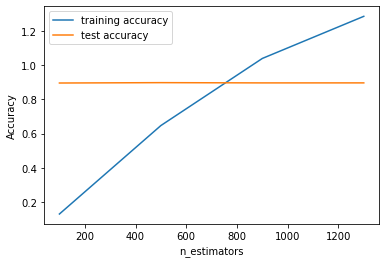

In [230]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_score_time"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [231]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [4,5],
    'n_estimators': [500,600], 
    'max_features': [10,15]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [232]:
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 60.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
           

In [233]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8027853293270377 using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 600}


In [339]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=3,
                             min_samples_leaf=2, 
                             min_samples_split=4,
                             max_features=10,
                             n_estimators=600,random_state=100)

In [340]:
rfc.fit(df_train_pca,y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [341]:
y_pred_default = rfc.predict(df_test_pca)


In [342]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8305
           1       0.24      0.73      0.36       681

    accuracy                           0.80      8986
   macro avg       0.60      0.77      0.62      8986
weighted avg       0.92      0.80      0.84      8986

[[6685 1620]
 [ 183  498]]
accuracy_score:   0.7993545515245938


In [343]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6685, 1620],
       [ 183,  498]], dtype=int64)

In [344]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.7993545515245938
Sensitivity:  0.7312775330396476
Specificity:  0.8049367850692354
false postive rate:  0.1950632149307646
positive predictive value:  0.23512747875354106
Negative predictive value:  0.9733546884100175
Misclassification Rate:  0.2006454484754062


### 8.Model Building 2

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
colss=X_train.columns

X_train= pd.DataFrame(scaler.fit_transform(X_train),columns=colss)

X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,0.415271,-0.197981,2.151611,-0.248194,-0.261684,0.023541,0.194566,0.057949,1.578646,0.121591,-0.195860,2.463819,7.196206,1.468470,1.325862,0.227721,0.0,1.302668,-0.593246,-0.351325,0.997804,-0.362714,1.651647,3.627237,0.322919,2.946590,0.703443,0.917802,2.700736,-0.250794,-0.096778,0.679863,-0.090174,0.390383,-0.612553,-0.709334,-0.689211,-0.400786,-0.475711,-0.378158,-0.441475,-0.371974,-0.262782,-0.745158,-0.457293,0.533583,-0.124338,0.739006,6.840029,6.494777,-0.439457,-0.586734,1.229963,-0.279022,-0.553593,-0.196410,-0.154224,-0.110006,-0.236766,-0.170933,-0.519293,0.224063,-0.518338,-0.630339,-0.400529,-0.224069,-0.548506,-0.218715,0.091703,-0.311485,-0.077774,-0.506517,-0.449570,0.057433,-0.305032,-0.523198,0.553839,-0.296973,0.342373,-0.714342,-0.839811,-0.851516,-0.483424,-0.528286,-0.464895,-0.498827,-0.432303,-0.316722,-0.479499
1,-1.224600,-0.563062,-0.781420,-0.064081,-0.149970,-0.507223,-0.720869,-0.407963,-0.335928,-0.736463,-0.415050,-0.450418,-0.234903,-0.550065,-0.150433,-0.489158,0.0,-0.849772,-0.593246,-0.785709,-0.448879,-0.816894,-0.361555,-0.446763,-0.283444,-0.474566,-0.860734,-0.263746,-0.252683,-0.250794,-0.684355,-1.173484,-0.872348,-0.537978,-0.612553,-0.709334,-0.689211,-0.400786,-0.475711,-0.378158,-0.441475,-0.371974,-0.262782,-1.067043,-0.457293,-0.282588,-0.094177,0.232302,-0.274098,-0.306601,-0.321493,-0.595111,-0.295090,-0.394332,-0.569460,0.079373,0.679514,0.513565,0.476610,-0.170933,2.185552,2.073059,0.154437,1.582218,-0.589314,-0.409870,0.104346,0.320031,2.312324,4.024607,1.903831,0.550452,-0.271074,-0.279266,1.526725,-0.014190,-0.409761,-0.654330,-0.746168,-0.714342,-0.839811,-0.851516,-0.483424,-0.528286,-0.464895,-0.498827,-0.432303,-0.316722,-0.479499
2,-0.857874,-0.560540,-0.611728,-0.248194,-0.261684,-0.469954,-0.363080,-0.407963,-0.335928,-0.484235,-0.415050,-0.450418,-0.234903,-0.550065,-0.150433,-0.488307,0.0,-0.727020,-0.506930,-0.166225,-0.435087,-0.363509,-0.152004,-0.446763,-0.283444,-0.396632,-0.461535,-0.263746,-0.252683,-0.250794,0.725831,-0.815820,-0.872348,-0.723651,1.344507,-0.460462,0.028838,1.278989,-0.475711,-0.378158,1.722653,-0.371974,-0.262782,-0.342022,-0.457293,-1.252711,-0.659615,-0.837888,-0.301381,-0.314669,-0.529618,-0.686426,-0.410912,-0.424985,-0.730242,-0.482037,-0.506673,-0.263848,-0.643029,-0.170933,-0.568196,-0.379294,-0.970742,0.511650,-0.664618,-0.393495,-0.332345,-0.381463,-0.47639

In [241]:
# RFE to reduce number of variables to 15
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',random_state=100)

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [242]:
# Columns chosen by RFE
col = X_train.columns[rfe.support_]
col

Index(['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'monthly_2g_8', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_loc_og_t2m_mou_av67', 'avg_std_og_t2m_mou_av67', 'avg_loc_ic_t2m_mou_av67'], dtype='object')

### Model 1

In [243]:
# Logistic regression using statsmodel
# Model 1
y_train=list(y_train)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4019.8
Date:                Mon, 18 Jan 2021   Deviance:                       8039.6
Time:                        22:29:54   Pearson chi2:                 6.60e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2793      0.079    -54.391      0.000      -4.434      -4.125
std_og_t2t_mou_8           -1.4575      0.192     -7.580      0.000      -1.834      -1.081
std_og_t2m_mou_8           -1.4475      0.193     -7.490      0.000      -1.826      -1.069
std_og_mou_8                2.5971      0.347      7.487      0.000       1.917       3.277
total_og_mou_8             -1.3339      0.201     -6.628      0.000      -1.728      -0.939
loc_ic_t2m_mou_8           -0.6328      0.268     -2.358      0.018      -1.159      -0.107
loc_ic_mou_8               -1.8414      0.284     -6.495      0.000      -2.397      -1.286
spl_ic_mou_8               -0.7600      0.109     -6.996      0.000      -0.973      -0.547
last_day_rch_amt_8         -0.5314      0.048    -11.172      0.000      -0.625      -0.438
total_rech_data_8          -1.0065      0.069    -14.652      0.000      -1.141      -0.872
monthly_2g_8               -0.5200      0.065     -7.962      0.000      -0.648      -0.392
avg_onnet_mou_av67          0.2432      0.034      7.156      0.000       0.177       0.310
avg_offnet_mou_av67         0.9267      0.120      7.722      0.000       0.691       1.162
avg_loc_og_t2m_mou_av67    -0.4426      0.086     -5.133      0.000      -0.612      -0.274
avg_std_og_t2m_mou_av67    -0.5272      0.107     -4.910      0.000      -0.738      -0.317
avg_loc_ic_t2m_mou_av67     0.5994      0.064      9.343      0.000       0.474       0.725
===========================================================================================
"""

In [244]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.019262
1    0.432338
2    0.017249
3    0.003003
4    0.022770
5    0.059426
6    0.067894
7    0.047438
8    0.000257
9    0.000003
dtype: float64

In [245]:
# converting predicted values dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.92621850e-02, 4.32337748e-01, 1.72488545e-02, 3.00311869e-03,
       2.27697849e-02, 5.94264974e-02, 6.78938690e-02, 4.74377043e-02,
       2.56502017e-04, 3.25993551e-06])

In [246]:
# Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.019262
1,0,0.432338
2,0,0.017249
3,0,0.003003
4,0,0.022770


In [247]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.019262,0
1,0,0.432338,0
2,0,0.017249,0
3,0,0.003003,0
4,0,0.022770,0


In [248]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[18997   218]
 [ 1329   423]]


In [249]:
# Printing accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9262173892306959


In [250]:
# Checking VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_mou_8,65.86
1,std_og_t2m_mou_8,26.33
0,std_og_t2t_mou_8,26.19
11,avg_offnet_mou_av67,22.64
13,avg_std_og_t2m_mou_av67,18.77
3,total_og_mou_8,8.87
12,avg_loc_og_t2m_mou_av67,8.56
4,loc_ic_t2m_mou_8,6.92
5,loc_ic_mou_8,5.44
14,avg_loc_ic_t2m_mou_av67,3.88


### Model 2

In [251]:
col2 = col.drop('std_og_mou_8',1)

In [252]:
# Model 2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4041.9
Date:                Mon, 18 Jan 2021   Deviance:                       8083.9
Time:                        22:29:56   Pearson chi2:                 1.91e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2758      0.079    -54.200      0.000      -4.430      -4.121
std_og_t2t_mou_8           -0.0380      0.096     -0.394      0.693      -0.227       0.151
std_og_t2m_mou_8           -0.0471      0.102     -0.462      0.644      -0.247       0.152
total_og_mou_8             -0.8630      0.156     -5.525      0.000      -1.169      -0.557
loc_ic_t2m_mou_8           -0.6606      0.272     -2.429      0.015      -1.194      -0.128
loc_ic_mou_8               -2.0118      0.285     -7.050      0.000      -2.571      -1.453
spl_ic_mou_8               -0.7638      0.109     -7.035      0.000      -0.977      -0.551
last_day_rch_amt_8         -0.5401      0.048    -11.328      0.000      -0.634      -0.447
total_rech_data_8          -1.0011      0.069    -14.615      0.000      -1.135      -0.867
monthly_2g_8               -0.5159      0.065     -7.899      0.000      -0.644      -0.388
avg_onnet_mou_av67          0.2304      0.034      6.860      0.000       0.165       0.296
avg_offnet_mou_av67         0.9337      0.115      8.095      0.000       0.708       1.160
avg_loc_og_t2m_mou_av67    -0.5003      0.082     -6.124      0.000      -0.660      -0.340
avg_std_og_t2m_mou_av67    -0.5318      0.104     -5.132      0.000      -0.735      -0.329
avg_loc_ic_t2m_mou_av67     0.6409      0.064     10.083      0.000       0.516       0.765
===========================================================================================
"""

In [253]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.020433
1    0.428275
2    0.016684
3    0.003207
4    0.024017
5    0.060713
6    0.063804
7    0.076037
8    0.000549
9    0.000002
dtype: float64

In [254]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.04330475e-02, 4.28275040e-01, 1.66843032e-02, 3.20653877e-03,
       2.40169658e-02, 6.07130349e-02, 6.38039377e-02, 7.60366018e-02,
       5.48839331e-04, 2.04525825e-06])

In [255]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.020433
1,0,0.428275
2,0,0.016684
3,0,0.003207
4,0,0.024017


In [256]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.020433,0
1,0,0.428275,0
2,0,0.016684,0
3,0,0.003207,0
4,0,0.024017,0


In [257]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19009   206]
 [ 1347   405]]


In [258]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9259312252587399


In [259]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,avg_offnet_mou_av67,22.64
12,avg_std_og_t2m_mou_av67,18.77
11,avg_loc_og_t2m_mou_av67,8.44
2,total_og_mou_8,7.82
3,loc_ic_t2m_mou_8,6.91
4,loc_ic_mou_8,5.41
1,std_og_t2m_mou_8,5.30
13,avg_loc_ic_t2m_mou_av67,3.85
0,std_og_t2t_mou_8,3.47
9,avg_onnet_mou_av67,2.21


### Model 3

In [260]:
col3 = col2.drop('std_og_t2t_mou_8',1)

In [261]:
# Model 3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4042.0
Date:                Mon, 18 Jan 2021   Deviance:                       8084.0
Time:                        22:29:57   Pearson chi2:                 2.16e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2766      0.079    -54.222      0.000      -4.431      -4.122
std_og_t2m_mou_8           -0.0200      0.076     -0.264      0.792      -0.169       0.129
total_og_mou_8             -0.9154      0.084    -10.908      0.000      -1.080      -0.751
loc_ic_t2m_mou_8           -0.6629      0.272     -2.440      0.015      -1.195      -0.130
loc_ic_mou_8               -1.9918      0.281     -7.099      0.000      -2.542      -1.442
spl_ic_mou_8               -0.7639      0.109     -7.036      0.000      -0.977      -0.551
last_day_rch_amt_8         -0.5398      0.048    -11.320      0.000      -0.633      -0.446
total_rech_data_8          -1.0007      0.068    -14.613      0.000      -1.135      -0.867
monthly_2g_8               -0.5159      0.065     -7.898      0.000      -0.644      -0.388
avg_onnet_mou_av67          0.2278      0.033      6.923      0.000       0.163       0.292
avg_offnet_mou_av67         0.9415      0.114      8.258      0.000       0.718       1.165
avg_loc_og_t2m_mou_av67    -0.4968      0.081     -6.102      0.000      -0.656      -0.337
avg_std_og_t2m_mou_av67    -0.5385      0.102     -5.255      0.000      -0.739      -0.338
avg_loc_ic_t2m_mou_av67     0.6376      0.063     10.116      0.000       0.514       0.761
===========================================================================================
"""

In [262]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.020232
1    0.427861
2    0.016706
3    0.003353
4    0.023875
5    0.060683
6    0.064049
7    0.071756
8    0.000499
9    0.000002
dtype: float64

In [263]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.02317944e-02, 4.27861466e-01, 1.67058511e-02, 3.35282545e-03,
       2.38749310e-02, 6.06829194e-02, 6.40485512e-02, 7.17561749e-02,
       4.98578326e-04, 2.16602378e-06])

In [264]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.020232
1,0,0.427861
2,0,0.016706
3,0,0.003353
4,0,0.023875


In [265]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.020232,0
1,0,0.427861,0
2,0,0.016706,0
3,0,0.003353,0
4,0,0.023875,0


In [266]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19010   205]
 [ 1348   404]]


In [267]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9259312252587399


In [268]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,avg_offnet_mou_av67,22.37
11,avg_std_og_t2m_mou_av67,18.58
10,avg_loc_og_t2m_mou_av67,8.27
2,loc_ic_t2m_mou_8,6.90
3,loc_ic_mou_8,5.15
0,std_og_t2m_mou_8,4.43
1,total_og_mou_8,4.43
12,avg_loc_ic_t2m_mou_av67,3.81
8,avg_onnet_mou_av67,2.07
5,last_day_rch_amt_8,1.10


### Model 4

In [269]:
col4 = col3.drop('std_og_t2m_mou_8',1)

In [270]:
# Model 4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4042.0
Date:                Mon, 18 Jan 2021   Deviance:                       8084.1
Time:                        22:29:58   Pearson chi2:                 2.27e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2769      0.079    -54.230      0.000      -4.431      -4.122
total_og_mou_8             -0.9311      0.059    -15.693      0.000      -1.047      -0.815
loc_ic_t2m_mou_8           -0.6632      0.272     -2.442      0.015      -1.195      -0.131
loc_ic_mou_8               -1.9871      0.280     -7.099      0.000      -2.536      -1.438
spl_ic_mou_8               -0.7641      0.109     -7.039      0.000      -0.977      -0.551
last_day_rch_amt_8         -0.5399      0.048    -11.319      0.000      -0.633      -0.446
total_rech_data_8          -1.0007      0.068    -14.613      0.000      -1.135      -0.867
monthly_2g_8               -0.5158      0.065     -7.897      0.000      -0.644      -0.388
avg_onnet_mou_av67          0.2310      0.031      7.555      0.000       0.171       0.291
avg_offnet_mou_av67         0.9426      0.114      8.266      0.000       0.719       1.166
avg_loc_og_t2m_mou_av67    -0.4955      0.081     -6.093      0.000      -0.655      -0.336
avg_std_og_t2m_mou_av67    -0.5436      0.101     -5.397      0.000      -0.741      -0.346
avg_loc_ic_t2m_mou_av67     0.6365      0.063     10.118      0.000       0.513       0.760
===========================================================================================
"""

In [271]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.020783
1    0.427079
2    0.016703
3    0.003300
4    0.023858
5    0.060658
6    0.064108
7    0.070847
8    0.000493
9    0.000002
dtype: float64

In [272]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.07834474e-02, 4.27079061e-01, 1.67033918e-02, 3.29992083e-03,
       2.38582760e-02, 6.06584274e-02, 6.41077800e-02, 7.08474481e-02,
       4.93124679e-04, 2.18646587e-06])

In [273]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.020783
1,0,0.427079
2,0,0.016703
3,0,0.003300
4,0,0.023858


In [274]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.020783,0
1,0,0.427079,0
2,0,0.016703,0
3,0,0.003300,0
4,0,0.023858,0


In [275]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19011   204]
 [ 1349   403]]


In [276]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9259312252587399


In [277]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,avg_offnet_mou_av67,22.32
10,avg_std_og_t2m_mou_av67,17.23
9,avg_loc_og_t2m_mou_av67,8.18
1,loc_ic_t2m_mou_8,6.89
2,loc_ic_mou_8,5.13
11,avg_loc_ic_t2m_mou_av67,3.80
0,total_og_mou_8,2.43
7,avg_onnet_mou_av67,1.65
4,last_day_rch_amt_8,1.10
5,total_rech_data_8,1.09


### Model 5

In [278]:
col5 = col4.drop('avg_offnet_mou_av67',1)

In [279]:
# Model 5
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4072.6
Date:                Mon, 18 Jan 2021   Deviance:                       8145.1
Time:                        22:30:00   Pearson chi2:                 7.72e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2876      0.079    -54.103      0.000      -4.443      -4.132
total_og_mou_8             -0.9393      0.060    -15.620      0.000      -1.057      -0.821
loc_ic_t2m_mou_8           -0.7078      0.274     -2.584      0.010      -1.245      -0.171
loc_ic_mou_8               -1.9877      0.282     -7.057      0.000      -2.540      -1.436
spl_ic_mou_8               -0.7737      0.109     -7.107      0.000      -0.987      -0.560
last_day_rch_amt_8         -0.4930      0.047    -10.529      0.000      -0.585      -0.401
total_rech_data_8          -1.0269      0.069    -14.868      0.000      -1.162      -0.891
monthly_2g_8               -0.5165      0.065     -7.967      0.000      -0.644      -0.389
avg_onnet_mou_av67          0.2240      0.031      7.317      0.000       0.164       0.284
avg_loc_og_t2m_mou_av67     0.0172      0.052      0.332      0.740      -0.084       0.119
avg_std_og_t2m_mou_av67     0.2586      0.029      8.970      0.000       0.202       0.315
avg_loc_ic_t2m_mou_av67     0.6118      0.063      9.734      0.000       0.489       0.735
===========================================================================================
"""

In [280]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.007085
1    0.442219
2    0.016524
3    0.003543
4    0.024461
5    0.060331
6    0.061050
7    0.074304
8    0.000486
9    0.000001
dtype: float64

In [281]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.08478436e-03, 4.42218584e-01, 1.65244453e-02, 3.54282061e-03,
       2.44606683e-02, 6.03311385e-02, 6.10499182e-02, 7.43040428e-02,
       4.86039135e-04, 1.03945633e-06])

In [282]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.007085
1,0,0.442219
2,0,0.016524
3,0,0.003543
4,0,0.024461


In [283]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.007085,0
1,0,0.442219,0
2,0,0.016524,0
3,0,0.003543,0
4,0,0.024461,0


In [284]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19018   197]
 [ 1360   392]]


In [285]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9257404492774359


In [286]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_ic_t2m_mou_8,6.89
2,loc_ic_mou_8,5.13
10,avg_loc_ic_t2m_mou_av67,3.79
0,total_og_mou_8,2.41
8,avg_loc_og_t2m_mou_av67,1.85
7,avg_onnet_mou_av67,1.64
9,avg_std_og_t2m_mou_av67,1.54
4,last_day_rch_amt_8,1.10
5,total_rech_data_8,1.09
3,spl_ic_mou_8,1.03


### Model 6

In [287]:
col6 = col5.drop('loc_ic_t2m_mou_8',1)

In [288]:
# Model 6
X_train_sm = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20956
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.8
Date:                Mon, 18 Jan 2021   Deviance:                       8151.6
Time:                        22:30:01   Pearson chi2:                 2.77e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.3039      0.080    -54.134      0.000      -4.460      -4.148
total_og_mou_8             -0.9459      0.060    -15.718      0.000      -1.064      -0.828
loc_ic_mou_8               -2.6592      0.130    -20.392      0.000      -2.915      -2.404
spl_ic_mou_8               -0.7754      0.109     -7.125      0.000      -0.989      -0.562
last_day_rch_amt_8         -0.4916      0.047    -10.502      0.000      -0.583      -0.400
total_rech_data_8          -1.0304      0.069    -14.920      0.000      -1.166      -0.895
monthly_2g_8               -0.5152      0.065     -7.951      0.000      -0.642      -0.388
avg_onnet_mou_av67          0.2297      0.031      7.523      0.000       0.170       0.290
avg_loc_og_t2m_mou_av67     0.0144      0.052      0.279      0.780      -0.087       0.115
avg_std_og_t2m_mou_av67     0.2584      0.029      8.969      0.000       0.202       0.315
avg_loc_ic_t2m_mou_av67     0.5837      0.061      9.548      0.000       0.464       0.704
===========================================================================================
"""

In [289]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    6.965536e-03
1    4.424025e-01
2    1.870400e-02
3    2.256702e-03
4    2.302771e-02
5    6.421874e-02
6    5.790862e-02
7    7.039336e-02
8    4.985790e-04
9    2.144213e-07
dtype: float64

In [290]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.96553558e-03, 4.42402527e-01, 1.87040028e-02, 2.25670200e-03,
       2.30277059e-02, 6.42187443e-02, 5.79086158e-02, 7.03933576e-02,
       4.98578981e-04, 2.14421336e-07])

In [291]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.006966
1,0,0.442403
2,0,0.018704
3,0,0.002257
4,0,0.023028


In [292]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.006966,0
1,0,0.442403,0
2,0,0.018704,0
3,0,0.002257,0
4,0,0.023028,0


In [293]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19018   197]
 [ 1362   390]]


In [294]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.925645061286784


In [295]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,avg_loc_ic_t2m_mou_av67,2.98
1,loc_ic_mou_8,2.53
0,total_og_mou_8,2.37
7,avg_loc_og_t2m_mou_av67,1.85
6,avg_onnet_mou_av67,1.60
8,avg_std_og_t2m_mou_av67,1.53
3,last_day_rch_amt_8,1.10
4,total_rech_data_8,1.09
2,spl_ic_mou_8,1.03
5,monthly_2g_8,1.03


### Model 7

In [296]:
col7 = col6.drop('avg_loc_og_t2m_mou_av67',1)

In [297]:
# Model 7
X_train_sm = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20957
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4075.8
Date:                Mon, 18 Jan 2021   Deviance:                       8151.6
Time:                        22:30:02   Pearson chi2:                 2.76e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.3040      0.080    -54.138      0.000      -4.460      -4.148
total_og_mou_8             -0.9446      0.060    -15.748      0.000      -1.062      -0.827
loc_ic_mou_8               -2.6565      0.130    -20.435      0.000      -2.911      -2.402
spl_ic_mou_8               -0.7757      0.109     -7.127      0.000      -0.989      -0.562
last_day_rch_amt_8         -0.4912      0.047    -10.499      0.000      -0.583      -0.400
total_rech_data_8          -1.0319      0.069    -14.986      0.000      -1.167      -0.897
monthly_2g_8               -0.5158      0.065     -7.963      0.000      -0.643      -0.389
avg_onnet_mou_av67          0.2294      0.031      7.518      0.000       0.170       0.289
avg_std_og_t2m_mou_av67     0.2580      0.029      8.968      0.000       0.202       0.314
avg_loc_ic_t2m_mou_av67     0.5921      0.053     11.117      0.000       0.488       0.696
===========================================================================================
"""

In [298]:
# predicted values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    7.013475e-03
1    4.426649e-01
2    1.871672e-02
3    2.261946e-03
4    2.306307e-02
5    6.443974e-02
6    5.851913e-02
7    7.053595e-02
8    5.028866e-04
9    2.191988e-07
dtype: float64

In [299]:
# converting predicted value dataframe to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.01347477e-03, 4.42664940e-01, 1.87167164e-02, 2.26194610e-03,
       2.30630715e-02, 6.44397380e-02, 5.85191257e-02, 7.05359493e-02,
       5.02886629e-04, 2.19198812e-07])

In [300]:
# # Data frame with predicted converted probabilty
y_train_pred_final = pd.DataFrame({'Churned':y_train, 'Churned_prob':y_train_pred})

y_train_pred_final.head()

,Churned,Churned_prob
0,0,0.007013
1,0,0.442665
2,0,0.018717
3,0,0.002262
4,0,0.023063


In [301]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churned_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_prob,predicted
0,0,0.007013,0
1,0,0.442665,0
2,0,0.018717,0
3,0,0.002262,0
4,0,0.023063,0


In [302]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[19019   196]
 [ 1365   387]]


In [303]:
# Accuracy score
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.925549673296132


In [304]:
# Checking VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_ic_mou_8,2.52
8,avg_loc_ic_t2m_mou_av67,2.34
0,total_og_mou_8,2.14
6,avg_onnet_mou_av67,1.56
7,avg_std_og_t2m_mou_av67,1.48
3,last_day_rch_amt_8,1.09
4,total_rech_data_8,1.08
2,spl_ic_mou_8,1.03
5,monthly_2g_8,1.03


- This model seems to be optimal with no high p values and no high VIF scores. We shall keep this model for further analysis

### Model Evaluation

In [305]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

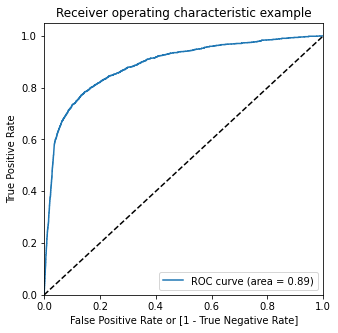

In [306]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_prob)

- We get AUC as 0.89

In [307]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churned_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007013,0,1,0,0,0,0,0,0,0,0,0
1,0,0.442665,0,1,1,1,1,1,0,0,0,0,0
2,0,0.018717,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002262,0,1,0,0,0,0,0,0,0,0,0
4,0,0.023063,0,1,0,0,0,0,0,0,0,0,0


In [308]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083560  1.000000  0.000000
0.1   0.1  0.816330  0.811073  0.816810
0.2   0.2  0.895646  0.714041  0.912204
0.3   0.3  0.926933  0.610160  0.955816
0.4   0.4  0.928411  0.371575  0.979183
0.5   0.5  0.925550  0.220890  0.989800
0.6   0.6  0.920876  0.095890  0.996097
0.7   0.7  0.918539  0.041667  0.998491
0.8   0.8  0.917251  0.014269  0.999584
0.9   0.9  0.916631  0.002854  0.999948


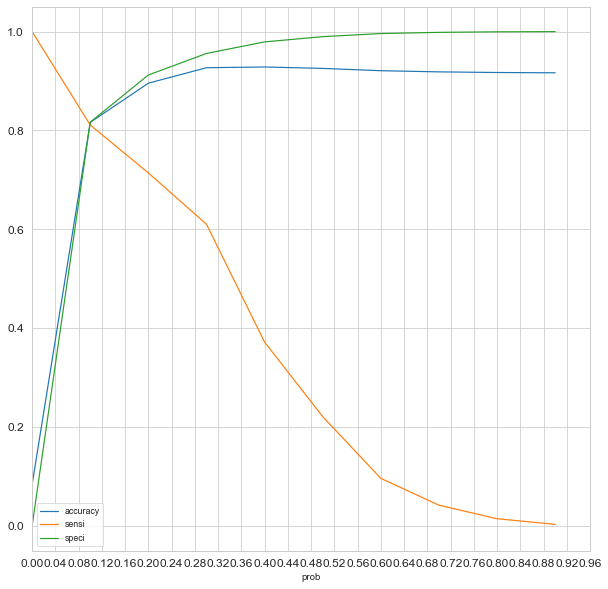

In [309]:
# plot to find out the right threshold
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,10))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.04), size = 12, )
plt.yticks(size = 12)
plt.show()


- 0.1 seems to be the right thershold

In [310]:
# Creating new column 'final_predicted' with 1 if Converted_prob > 0.1 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Churned_prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churned,Churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.007013,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.442665,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.018717,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002262,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.023063,0,1,0,0,0,0,0,0,0,0,0,0


In [311]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8163304239996184

In [312]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

array([[15695,  3520],
       [  331,  1421]], dtype=int64)

In [313]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8110730593607306

- We get a very good sensitivity value of 0.81

In [315]:
# Let us calculate specificity
TN / float(TN+FP)

0.8168097840228987

### Prediction on test data

In [316]:
# scaling X_test
colss=X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test),columns=colss)

X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,3.870392,-0.133330,1.771537,5.197260,3.648948,-0.436273,0.849503,0.241560,2.169144,0.357010,0.016975,1.087727,-0.234903,0.659784,-0.150433,-0.489158,0.0,0.709640,-0.409625,0.356673,-0.369580,0.033743,3.918343,6.237671,-0.283444,5.744033,1.464002,-0.263746,-0.252683,-0.180947,0.255769,3.837012,5.446796,1.504417,-0.612553,-0.709334,-0.689211,-0.400786,-0.475711,-0.378158,-0.441475,-0.371974,-0.262782,-1.001416,-0.457293,4.499258,-0.223595,0.999079,7.854389,7.504686,-0.529269,-0.234300,-0.415469,-0.260047,-0.436892,-0.347229,-0.171442,-0.263848,-0.343525,-0.170933,-0.568196,-0.379294,-0.554768,-0.637097,-0.327320,-0.437439,-0.526682,1.876082,1.437034,-0.273355,1.546002,-0.090085,-0.449570,-0.279266,-0.305032,-0.141442,4.620070,6.195009,5.259953,-0.714342,-0.839811,-0.851516,-0.483424,-0.528286,-0.464895,-0.498827,-0.432303,-0.316722,-0.479499
1,0.304479,-0.522655,-0.062762,-0.248194,-0.261684,-0.362176,0.694624,-0.332224,-0.335928,0.263491,-0.415050,-0.450418,-0.234903,-0.550065,2.005573,-0.188970,0.0,-0.346526,-0.396822,2.412138,0.978151,1.583876,-0.361555,-0.429156,-0.283444,-0.463224,1.148832,-0.263746,-0.252683,-0.250794,-0.331809,0.460929,0.836085,-0.816487,-0.221141,1.072593,0.339036,-0.400786,1.189666,-0.378158,-0.441475,1.445591,-0.262782,2.854945,-0.457293,-0.556251,-0.618371,-0.144919,-0.301381,-0.314669,-0.425468,0.686303,0.571107,-0.424985,0.250754,-0.479260,-0.513514,-0.263848,-0.645684,-0.170933,-0.568196,-0.379294,-0.470069,-0.379904,1.826275,1.873210,1.287412,-0.209376,-0.493645,0.983394,-0.347773,1.060934,-0.449570,1.047201,-0.305032,-0.650450,-0.519021,0.067829,0.254852,-0.298257,0.831439,0.141351,-0.483424,0.811178,2.096181,-0.498827,-0.432303,-0.316722,-0.479499
2,0.005789,-0.301136,-0.594307,-0.073662,-0.248888,0.237121,-0.333523,-0.407963,-0.335928,-0.151437,-0.402488,-0.449202,-0.234903,-0.541492,-0.150433,-0.489158,0.0,-0.557798,1.231546,0.394417,-0.372683,0.641298,0.153633,-0.064524,0.098053,-0.006476,0.479831,-0.263746,-0.249534,-0.250794,1.313408,-0.002949,-0.735124,-0.584397,1.735920,-0.460462,0.172448,-0.231106,0.747581,-0.378158,2.155479,-0.371974,-0.262782,-0.761826,0.800009,-0.504310,-0.551086,-0.806350,-0.174885,-0.309424,-0.288898,-0.641518,-0.437494,-0.124302,-0.590551,-0.461417,-0.497538,-0.263848,-0.624272,-0.170933,-0.449850,-0.379294,-0.880444,0.419737,0.035672,-0.452978,0.098841,-0.162679,-0.387157,0.460257,-0.304633,-0.

In [317]:
X_test = X_test[col7]

In [318]:
X_test_sm = sm.add_constant(X_test)

In [319]:
# prediction on x_test
y_test_pred = res.predict(X_test_sm)

In [320]:
# predicted values
y_test_pred[:10]

0    0.006302
1    0.001747
2    0.001092
3    0.044417
4    0.019995
5    0.000014
6    0.000096
7    0.000087
8    0.014668
9    0.020344
dtype: float64

In [321]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [322]:
# Let's see the head
y_pred_1.head()

,0
0,0.006302
1,0.001747
2,0.001092
3,0.044417
4,0.019995


In [323]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [324]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [325]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [326]:
y_pred_final.head()

,churn,0
0,0,0.006302
1,0,0.001747
2,0,0.001092
3,0,0.044417
4,0,0.019995


In [327]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churned_prob'})

In [328]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,Churned_prob
0,0,0.006302
1,0,0.001747
2,0,0.001092
3,0,0.044417
4,0,0.019995


In [329]:
# Using 0.28 threshold to create 'final_predicted' column
y_pred_final['final_predicted'] = y_pred_final.Churned_prob.map(lambda x: 1 if x > 0.1 else 0)

In [330]:
y_pred_final.head()

,churn,Churned_prob,final_predicted
0,0,0.006302,0
1,0,0.001747,0
2,0,0.001092,0
3,0,0.044417,0
4,0,0.019995,0


### Evaluation on test data

In [331]:
# Let's check the overall accuracy for test data
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.813598931671489

In [332]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6761, 1544],
       [ 131,  550]], dtype=int64)

In [333]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [334]:
# Let's see the sensitivity of our test data
TP / float(TP+FN)

0.8076358296622613

- We get a very good sensitivity score of 0.807

In [335]:
# Let us calculate specificity
TN / float(TN+FP)

0.8140878988561108

In [336]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

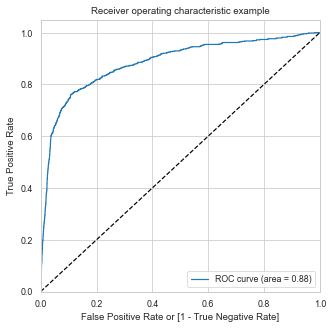

In [337]:
draw_roc(y_pred_final.churn, y_pred_final.Churned_prob)

- We get AUC for test data set as 0.88

In [338]:
new_params = res.params[1:]
new_params.sort_values()

loc_ic_mou_8              -2.656506
total_rech_data_8         -1.031928
total_og_mou_8            -0.944580
spl_ic_mou_8              -0.775690
monthly_2g_8              -0.515785
last_day_rch_amt_8        -0.491248
avg_onnet_mou_av67         0.229427
avg_std_og_t2m_mou_av67    0.258031
avg_loc_ic_t2m_mou_av67    0.592071
dtype: float64

We shall look at sensitivity score for each model because we want maximum number of 1's(churn) to be predicted as 1's.

- Logistic Regression with PCA: sensitivity=0.813
- Decission Trees: sensitivity=0.759
- Random Forest: sensitivity=0.731
- Logistic Regression: sensitivity=0.807

Logistic Regression seems to outperform other models in predicting the churn

Below are the important predictors that determines whether the customer churns. Importance scale: The first one being most important and the last one being least important.

- loc_ic_mou_8
- total_rech_data_8
- total_og_mou_8
- spl_ic_mou_8
- avg_loc_ic_t2m_mou_av67
- monthly_2g_8
- last_day_rch_amt_8
- avg_std_og_t2m_mou_av67
- avg_onnet_mou_av67

#### RECOMMENDATIONS

- Customers with less than 5 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
- 'mou' minutes of usage for 8th month seems to be most important predictor for predicting churn.
- Incoming and Outgoing calls on for 8th month are strong indicators of churn behaviour
- 2g usage for 8th month is also a strong predictor of churn behaviour.